### 1. MNIST - Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression

import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [95]:
import warnings
warnings.filterwarnings(action='once')

In [96]:
# load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [97]:
np.shape(x_train)

(60000, 28, 28)

#### Logistic Regression

In [98]:
# initialise classifier
clf_log = LogisticRegression(C=1e15,
                             multi_class='multinomial',
                             penalty='l2',
                             solver='sag',
                             tol=0.01,
                             random_state=42
                             )

# fit data using classifier
clf_log.fit(np.array(x_train).reshape((60000, 784))[:10000], y_train[:10000])

# compute accuracy
score_log = clf_log.score(np.array(x_test).reshape((10000,784)), y_test)
print(f'Logistic Regression Accuracy: {score_log:.4f}')

/Users/bgracias/Documents/Uni-of-Cambridge/DiS/repos/m1-machine-learning/problem-sheets/m1_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9030


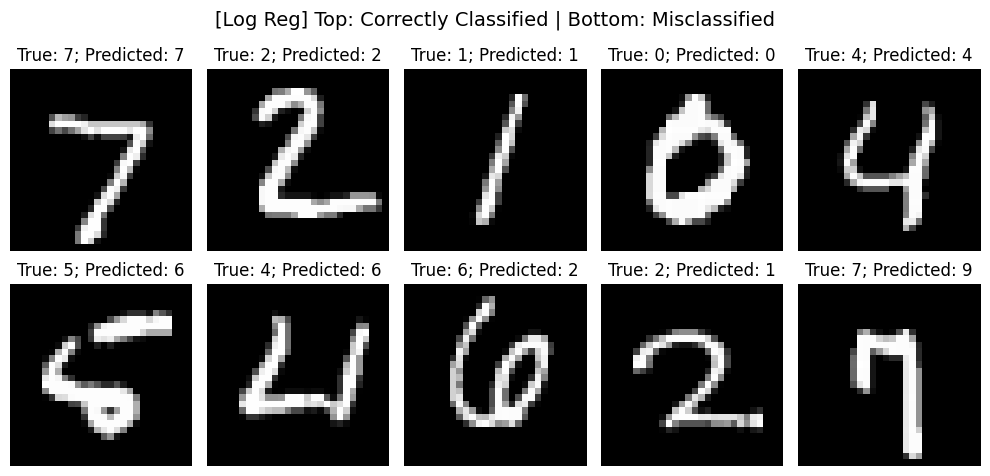

In [99]:
# predicted values
y_preds_log = clf_log.predict(np.array(x_test).reshape((10000,784)))

# true and false examples
true_indices_log = np.where(y_preds_log == y_test)[0][:5]
false_indices_log = np.where(y_preds_log != y_test)[0][:5]

# plot examples
plt.figure(figsize=(10,5))

# true examples
for i, idx in enumerate(true_indices_log):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}; Predicted: {y_preds_log[idx]}')
    plt.axis('off')
    
# false examples
for i, idx in enumerate(false_indices_log):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}; Predicted: {y_preds_log[idx]}')
    plt.axis('off')

plt.suptitle("[Log Reg] Top: Correctly Classified | Bottom: Misclassified", fontsize=14)
plt.tight_layout()
plt.show()

In [108]:
# scanning over different hyperparams
param_grid_log = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1],
        'solver': ['newton-cg', 'sag'],
        'max_iter': [1000, 2000]
    }
]

# grid search and score accuracy
from sklearn.model_selection import GridSearchCV
clf_hp_log = LogisticRegression()
clf_gs_log = GridSearchCV(clf_hp_log,
                          param_grid=param_grid_log,
                          cv=3,
                          verbose=False,
                          n_jobs=-1,
                          scoring='accuracy'
                          )

# fit models
clf_gs_log.fit(np.array(x_train).reshape((60000, 784))[:10000], y_train[:10000])

# print results
gs_log_df = pd.DataFrame(clf_gs_log.cv_results_)
gs_log_df = gs_log_df.sort_values(by='mean_test_score', ascending=False)
print(gs_log_df[['mean_test_score', 'param_penalty', 'param_C', 'param_solver', 'param_max_iter']].head(5))

   mean_test_score param_penalty  param_C param_solver  param_max_iter
5           0.9103            l2      0.1          sag            1000
7           0.9103            l2      0.1          sag            2000
4           0.9102            l2      0.1    newton-cg            1000
6           0.9102            l2      0.1    newton-cg            2000
9           0.9009            l2      1.0          sag            1000


#### SGD Classifier

In [101]:
# initialise classifier
clf_sgd = SGDClassifier(loss='log_loss',
                        alpha=0.001,
                        penalty='l2',
                        max_iter=1000,
                        tol=0.001,
                        random_state=42
                        )

# fit data using classifier
clf_sgd.fit(np.array(x_train).reshape((60000, 784))[:10000], y_train[:10000])

# compute accuracy
score_sgd = clf_sgd.score(np.array(x_test).reshape((10000,784)), y_test)
print(f'SGD Classifier Accuracy: {score_sgd:.4f}')

SGD Classifier Accuracy: 0.8996


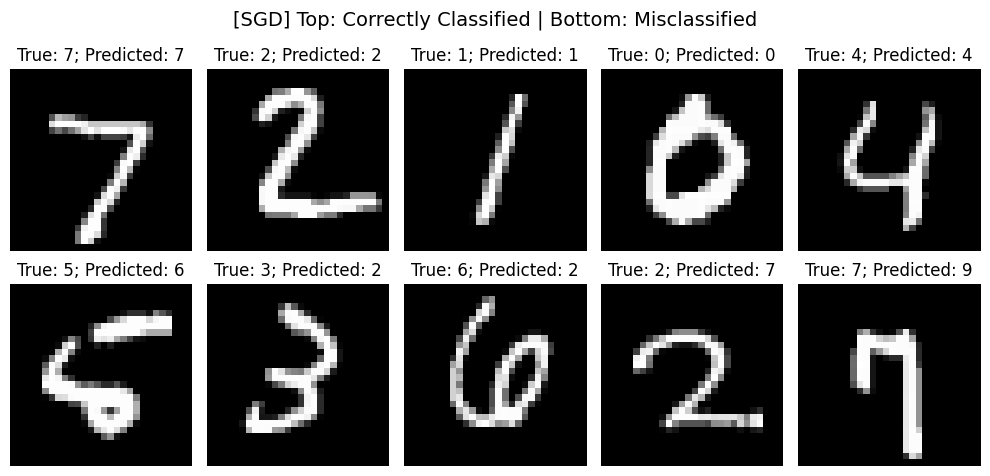

In [ ]:
# predicted values
y_preds_sgd = clf_sgd.predict(np.array(x_test).reshape((10000,784)))

# true and false examples
true_indices_sgd = np.where(y_preds_sgd == y_test)[0][:5]
false_indices_sgd = np.where(y_preds_sgd != y_test)[0][:5]

# plot examples
plt.figure(figsize=(10,5))

# true examples
for i, idx in enumerate(true_indices_sgd):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}; Predicted: {y_preds_sgd[idx]}')
    plt.axis('off')
    
# false examples
for i, idx in enumerate(false_indices_sgd):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}; Predicted: {y_preds_sgd[idx]}')
    plt.axis('off')

plt.suptitle("[SGD] Top: Correctly Classified | Bottom: Misclassified", fontsize=14)
plt.tight_layout()
plt.show()

In [103]:
# scanning over different hyperparams
param_grid_sgd = [
    {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1],
        'loss': ['log_loss', 'hinge'],
        'max_iter': [100, 1000]
    }
]

# grid search and score accuracy
clf_hp_sgd = SGDClassifier()
clf_gs_sgd = GridSearchCV(clf_hp_sgd,
                          param_grid=param_grid_sgd,
                          cv=3,
                          verbose=False,
                          n_jobs=-1,
                          scoring='accuracy'
                          )

# fit models
clf_gs_sgd.fit(np.array(x_train).reshape((60000, 784))[:10000], y_train[:10000])

# print results
gs_sgd_df = pd.DataFrame(clf_gs_sgd.cv_results_)
gs_sgd_df = gs_sgd_df.sort_values(by='mean_test_score', ascending=False)
print(gs_sgd_df[['mean_test_score', 'param_penalty', 'param_alpha', 'param_loss', 'param_max_iter']].head(5))

    mean_test_score param_penalty  param_alpha param_loss  param_max_iter
3            0.8948            l2        0.001   log_loss            1000
13           0.8947            l2        0.010      hinge             100
15           0.8947            l2        0.010      hinge            1000
1            0.8946            l2        0.001   log_loss             100
5            0.8915            l2        0.001      hinge             100


In [104]:
# results compared to random guessing
np.random.seed(280400)
y_rand = np.random.randint(0, 10, size=len(y_test))
score_rand = np.mean(y_rand == y_test)

print(f'Random Guessing Accuracy: {score_rand:.4f}')
print(f'Logistic Regression Accuracy: {score_log:.4f}')
print(f'SGD Classifier Accuracy: {score_sgd:.4f}')

Random Guessing Accuracy: 0.1033
Logistic Regression Accuracy: 0.9030
SGD Classifier Accuracy: 0.8996


### 2. 1D Ising - Regression

In [149]:
L = 40

# create 10000 random Ising states
states = np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J = np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L] -= 1.0
        
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)
    return E

# calculate Ising energies
energies = ising_energies(states,L)

In [150]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states = np.einsum('...i,...j->...ij', states, states)
shape = states.shape
states = states.reshape((shape[0],shape[1]*shape[2]))

# build final data set
states_energy_data = [states, energies]

In [ ]:
# define number of samples
n_samples = 5000

# define train and test data sets
X_train = states_energy_data[0][:n_samples]
Y_train = states_energy_data[1][:n_samples]
X_test = states_energy_data[0][n_samples:3*n_samples//2]
Y_test = states_energy_data[1][n_samples:3*n_samples//2]

In [155]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# set up Lasso and Ridge Regression models
leastsq = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

# set regularisation strength values
lmbdas = np.logspace(-4, 5, 10)

# initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso = []

In [156]:
for lmbda in lmbdas:
    # ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test, Y_test))
    
    # apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test, Y_test))
    
    # apply Lasso regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test, Y_test))

/Users/bgracias/Documents/Uni-of-Cambridge/DiS/repos/m1-machine-learning/problem-sheets/m1_venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.261e+00, tolerance: 3.710e+00
  model = cd_fast.enet_coordinate_descent(


50 samples

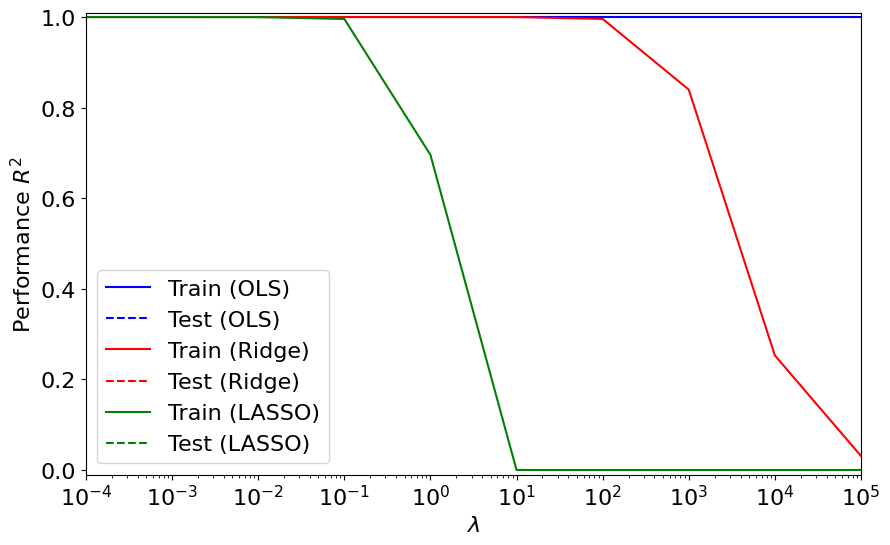

In [136]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b', label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq, '--b', label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge, 'r', label='Train (Ridge)')
plt.semilogx(lmbdas, test_errors_ridge, '--r', label='Test (Ridge)')
plt.semilogx(lmbdas, train_errors_lasso, 'g', label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g', label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance $R^2$',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

500 samples

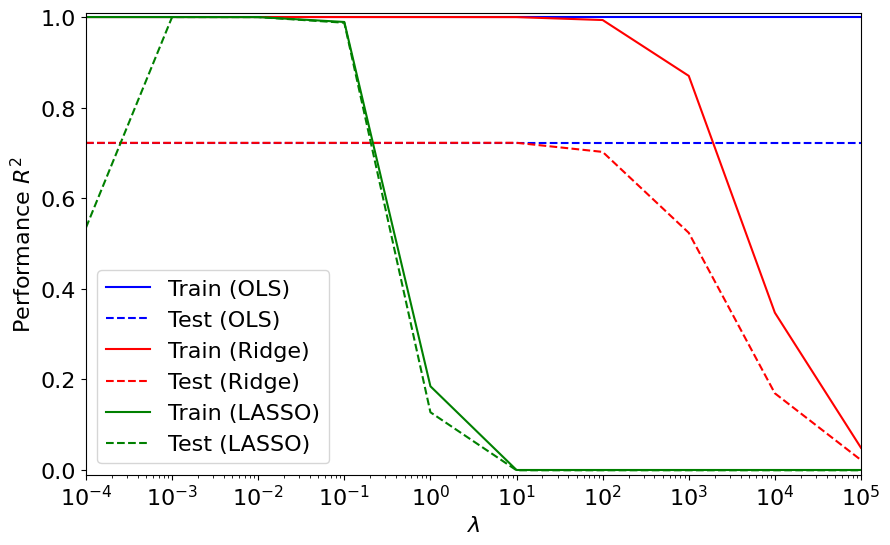

In [140]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b', label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq, '--b', label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge, 'r', label='Train (Ridge)')
plt.semilogx(lmbdas, test_errors_ridge, '--r', label='Test (Ridge)')
plt.semilogx(lmbdas, train_errors_lasso, 'g', label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g', label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance $R^2$',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

5000 samples

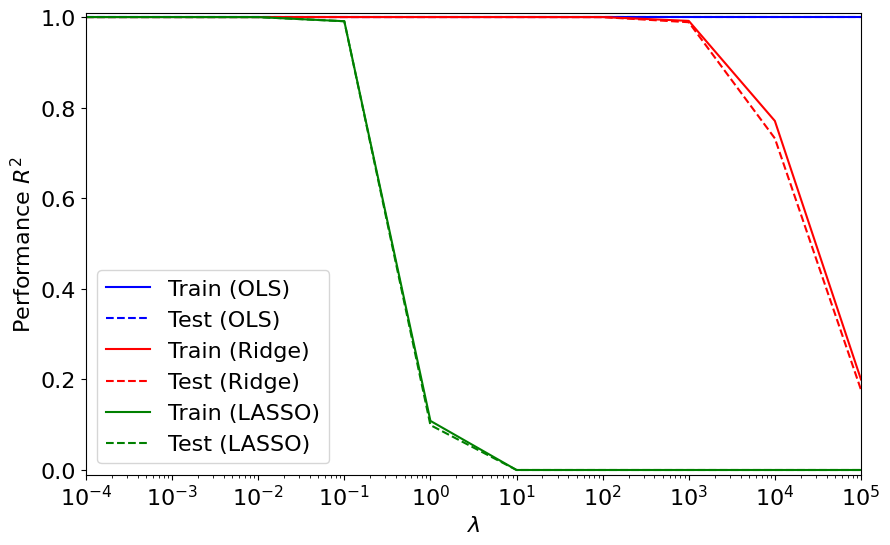

In [144]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b', label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq, '--b', label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge, 'r', label='Train (Ridge)')
plt.semilogx(lmbdas, test_errors_ridge, '--r', label='Test (Ridge)')
plt.semilogx(lmbdas, train_errors_lasso, 'g', label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g', label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance $R^2$',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

### 3. Perceptron - XOR

In [157]:
# single perceptron with step activation
def perceptron(x1, x2, w1, w2, b):
    z = w1*x1 + w2*x2 + b
    return int(z > 0)

# binary inputs
inputs = [(0,0), (0,1), (1,0), (1,1)]

In [ ]:
# AND gate
print("AND Gate:")
for x1, x2 in inputs:
    print(f'{x1} AND {x2} = {perceptron(x1, x2, 1, 1, -1.5)}')

AND Gate:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


In [ ]:
# OR gate
print("OR Gate:")
for x1, x2 in inputs:
    print(f'{x1} OR {x2} = {perceptron(x1, x2, 1, 1, -0.5)}')

OR Gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1


In [161]:
# NOT gate
print("NOT Gate:")
for x1 in [0, 1]:
    print(f'NOT {x1} = {perceptron(x1, 0, -1, 0, 0.5)}')

NOT Gate:
NOT 0 = 1
NOT 1 = 0


Single perceptron insufficient for XOR:
- single perceptron divides input space using single straight line
- all points on either side are 1 or 0 -> linearly separable
- XOR is not linearly separable -> 1s at (0,1) and (1,0), 0s at (0,0) and (1,1) -> no single straight line can separate

In [162]:
# XOR gate
def xor_gate(x1, x2):
    # hidden layer
    h1 = perceptron(x1, x2, 1, 1, -0.5) # OR gate
    h2 = perceptron(x1, x2, -1, -1, 1.5) # NAND gate
    
    # output layer
    y = perceptron(h1, h2, 1, 1, -1.5) # AND gate
    return y

print("XOR Gate:")
for x1, x2 in inputs:
    print(f'{x1} XOR {x2} = {xor_gate(x1, x2)}')

XOR Gate:
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0
